## Expense Trends and Departmental Analysis (Flag 43)

### Dataset Description
The dataset consists of 642 entries, capturing detailed records of financial expenses within an organization. The data simulates the ServiceNow `fm_expense_line` table, including key fields such as 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'processed_date', 'source_id', and 'type'. This dataset documents the flow of financial transactions, offering a comprehensive view of organizational spending by detailing the amount, departmental allocation, and nature of each expense. It highlights different expense categories, departmental spending patterns, and the processing state of each entry, providing valuable insights into both the financial operations and the efficiency of expense processing within the organization.

### Your Task
**Goal**: To analyze departmental spending patterns, uncover insights into expense allocation across categories, and assess the efficiency of the expense processing workflow.

**Role**: Financial Analyst

**Difficulty**: 3 out of 5.

**Category**: Finance Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [18]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from openai import OpenAI
from pandas import date_range



### Load Dataset
This cell loads the expense dataset to be analyzed. The data is orginally saved in the from a CSV file, and is here imported into a DataFrame. The steps involve specifying the path to the dataset, using pandas to read the file, and confirming its successful load by inspecting the first few table entries.

In [19]:
dataset_path = "csvs/flag-43.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()

,number,opened_at,amount,state,short_description,ci,user,department,category,processed_date,source_id,type,location,processing_time_hours
0,468f23f9-828c-4763-8a7c-23fef13cad88,2024-04-07 11:19:29,41825,Submitted,Trade range fly it move.,television,nlewis,Finance,Assets,2024-03-14 01:45:27,374217e1-3032-4c60-87d4-dd1e7981e253,Recurring,South America,-585.567222
1,4710fa1b-1b7d-4fa0-933d-b58cb6df2081,2024-07-04 08:10:00,19938,Declined,Air old southern Mrs summer six food recently.,like,thomastyler,HR,Services,2024-09-20 13:30:34,37104364-a616-444b-a611-89c176910aff,Recurring,North America,1877.342778
2,ce58c131-9b46-40b9-9447-bbecf9f8d5f1,2024-02-25 17:44:46,57593,Declined,Area personal despite.,defense,xramirez,Finance,Services,2024-05-25 00:00:22,52b769d5-1b45-474f-8c9c-4f57cf3d7803,Recurring,Africa,2142.260000
3,d87cecab-0969-4f09-8d93-d8aa7cf54b4c,2024-02-15 18:23:35,82005,Submitted,Day none teacher face mention race sell.,test,russellromero,Customer Support,Miscellaneous,2024-02-09 01:15:27,e5fc6394-ef0e-41ee-a1e0-fef47862bb60,Recurring,Africa,-161.135556
4,9e4d5e28-6eff-4546-a334-f79c615d842f,2024-05-03 18:08:38,74838,Declined,Upon financial nothing fill form fall method p...,quickly,alanharrison,Customer Support,Services,2024-06-28 20:51:55,196abe47-17fc-4638-bd03-0100a4a4d97e,Recurring,Europe,1346.721389


### **Question 1: What are the total expenses by department?**

This analysis will help identify which departments are incurring the most significant expenses. By summing up the expenses for each department, we can gain insights into how financial resources are allocated across the organization.

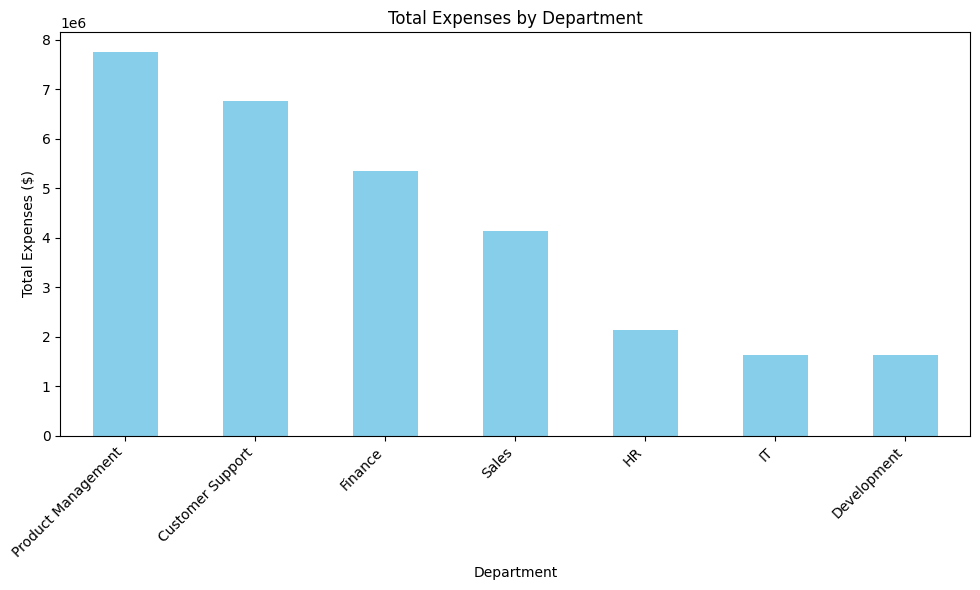

In [20]:
import matplotlib.pyplot as plt

# Group by department and sum the amount
department_expenses = df.groupby('department')['amount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
department_expenses.plot(kind='bar', color='skyblue')
plt.title('Total Expenses by Department')
plt.xlabel('Department')
plt.ylabel('Total Expenses ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [21]:
{
    "data_type": "descriptive",
    "insight": "Total expenses vary significantly across departments.",
    "insight_value": {
        "description": "The Product Management department has the highest total expenses, followed by Customer Support, indicating that these departments might have more resource-intensive operations."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Total Expenses by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Product Management", "Customer Support", "Finance", "Sales", "HR", "IT", "Development"],
            "description": "This axis categorizes departments to illustrate the variations in total spending."
        },
        "y_axis": {
            "name": "Total Expenses ($)",
            "value": {
                "Product Management": 7764542,
                "Customer Support": 6757395,
                "Finance": 5344267,
                "Sales": 4128050,
                "HR": 2130369,
                "IT": 1627271,
                "Development": 1620906
            },
            "description": "This axis displays the total expense amount in dollars for each department."
        },
        "description": "The bar chart highlights the departments with the highest expenses, which might indicate areas of heavy resource allocation or potential inefficiencies."
    },
    "question": "What are the total expenses by department?",
    "actionable_insight": {
        "description": "Departments with higher expenses should be reviewed to ensure that spending aligns with organizational goals. It's crucial to investigate whether these expenditures are justified and contribute positively to the organization's operations."
    }
}

{'data_type': 'descriptive',
 'insight': 'Total expenses vary significantly across departments.',
 'insight_value': {'description': 'The Product Management department has the highest total expenses, followed by Customer Support, indicating that these departments might have more resource-intensive operations.'},
 'plot': {'plot_type': 'bar',
  'title': 'Total Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['Product Management',
    'Customer Support',
    'Finance',
    'Sales',
    'HR',
    'IT',
    'Development'],
   'description': 'This axis categorizes departments to illustrate the variations in total spending.'},
  'y_axis': {'name': 'Total Expenses ($)',
   'value': {'Product Management': 7764542,
    'Customer Support': 6757395,
    'Finance': 5344267,
    'Sales': 4128050,
    'HR': 2130369,
    'IT': 1627271,
    'Development': 1620906},
   'description': 'This axis displays the total expense amount in dollars for each department.'},
  'description': 

### **Question 2:** What are the average expenses per user within each department?

This analysis will reveal the average expense per user within each department. This insight helps to understand individual spending behavior and whether there are significant discrepancies across departments.

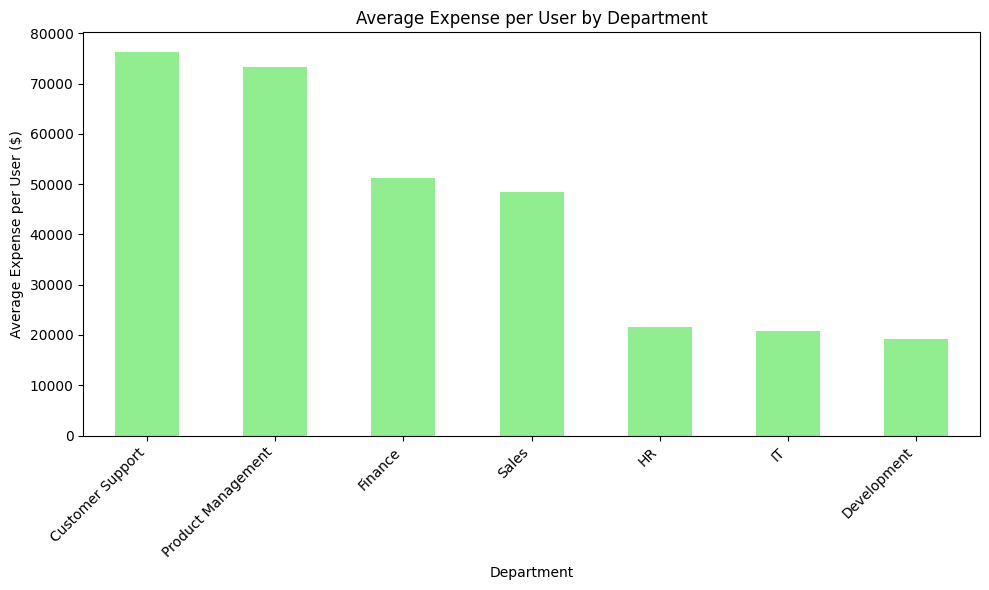

In [22]:
# Group by department and user, then calculate the average amount
average_expense_per_user = df.groupby(['department', 'user'])['amount'].mean().groupby('department').mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
average_expense_per_user.plot(kind='bar', color='lightgreen')
plt.title('Average Expense per User by Department')
plt.xlabel('Department')
plt.ylabel('Average Expense per User ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [23]:
{
    "data_type": "descriptive",
    "insight": "Customer Support has the highest average expense claims.",
    "insight_value": {
        "description": "Customer Support's average expense claim is approximately $76,380.74, which is significantly higher than the other departments."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Expense per User by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Product Management", "Finance", "Sales", "HR", "IT", "Development"],
            "description": "This axis categorizes departments to show the average expense per user."
        },
        "y_axis": {
            "name": "Average Expense per User ($)",
            "value": {
                "Customer Support": "76380.74$",
                "Product Management": "73339.73$",
                "Finance": "51187.13$",
                "Sales": "48387.91$",
                "HR": "21682.97$",
                "IT": "20718.09$",
                "Development": "19165.07$"
            },
            "description": "This axis displays the average amount in dollars for each department."
        },
        "description": "The bar chart highlights that Customer Support has a much higher average expense per user, which may indicate the nature of their operations or potential inefficiencies."
    },
    "question": "What is the average expense per user by department?",
    "actionable_insight": {
        "description": "It's advisable to review the expense claims in Customer Support to ensure they align with company policies and provide value. High average expenses should be justified by the department's activities."
    }
}

{'data_type': 'descriptive',
 'insight': 'Customer Support has the highest average expense claims.',
 'insight_value': {'description': "Customer Support's average expense claim is approximately $76,380.74, which is significantly higher than the other departments."},
 'plot': {'plot_type': 'bar',
  'title': 'Average Expense per User by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Product Management',
    'Finance',
    'Sales',
    'HR',
    'IT',
    'Development'],
   'description': 'This axis categorizes departments to show the average expense per user.'},
  'y_axis': {'name': 'Average Expense per User ($)',
   'value': {'Customer Support': '76380.74$',
    'Product Management': '73339.73$',
    'Finance': '51187.13$',
    'Sales': '48387.91$',
    'HR': '21682.97$',
    'IT': '20718.09$',
    'Development': '19165.07$'},
   'description': 'This axis displays the average amount in dollars for each department.'},
  'description': 'The bar chart

### **Question 3:What are the total expenses by category?**


Understanding the distribution of expenses across different categories can help identify areas where the company is spending the most and potentially optimize costs.



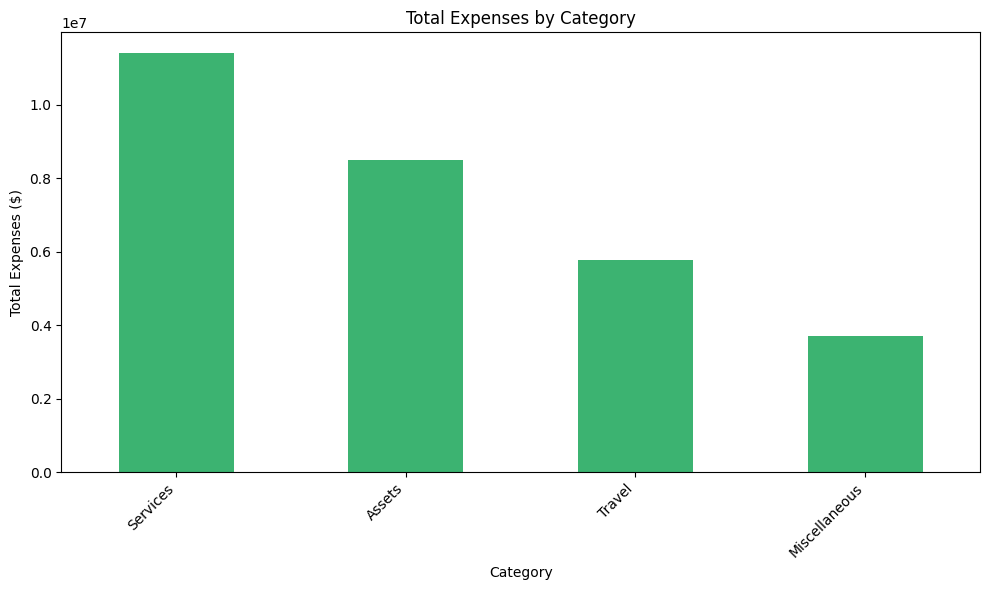

In [24]:
import matplotlib.pyplot as plt

# Group by category and sum the amount
total_expenses_by_category = df.groupby('category')['amount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
total_expenses_by_category.plot(kind='bar', color='mediumseagreen')
plt.title('Total Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Total Expenses ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [25]:
{
    "data_type": "descriptive",
    "insight": "The 'Services' category has the highest total expenses.",
    "insight_value": {
        "description": "The company has spent a total of $11,400,891 on services, which is the highest among all categories."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Total Expenses by Category",
        "x_axis": {
            "name": "Category",
            "value": ["Services", "Assets", "Travel", "Miscellaneous"],
            "description": "This axis categorizes expenses into different categories to show the total spending."
        },
        "y_axis": {
            "name": "Total Expenses ($)",
            "value": {
                "Services": "11400891$",
                "Assets": "8486017$",
                "Travel": "5767902$",
                "Miscellaneous": "3717990$"
            },
            "description": "This axis displays the total expense amount in dollars for each category."
        },
        "description": "The bar chart highlights that 'Services' is the category with the highest spending, indicating significant investments in service-related expenses."
    },
    "question": "What are the total expenses by category?",
    "actionable_insight": {
        "description": "The high spending on services should be regularly reviewed to ensure that these investments are necessary and beneficial to the company. Potential cost-saving measures could be explored in categories with high expenses."
    }
}

{'data_type': 'descriptive',
 'insight': "The 'Services' category has the highest total expenses.",
 'insight_value': {'description': 'The company has spent a total of $11,400,891 on services, which is the highest among all categories.'},
 'plot': {'plot_type': 'bar',
  'title': 'Total Expenses by Category',
  'x_axis': {'name': 'Category',
   'value': ['Services', 'Assets', 'Travel', 'Miscellaneous'],
   'description': 'This axis categorizes expenses into different categories to show the total spending.'},
  'y_axis': {'name': 'Total Expenses ($)',
   'value': {'Services': '11400891$',
    'Assets': '8486017$',
    'Travel': '5767902$',
    'Miscellaneous': '3717990$'},
   'description': 'This axis displays the total expense amount in dollars for each category.'},
  'description': "The bar chart highlights that 'Services' is the category with the highest spending, indicating significant investments in service-related expenses."},
 'question': 'What are the total expenses by category?'

### **Question 4:  How many expenses have been processed by each department?**


This analysis reveals the workload and activity level of each department by showing the number of expenses that have been processed.

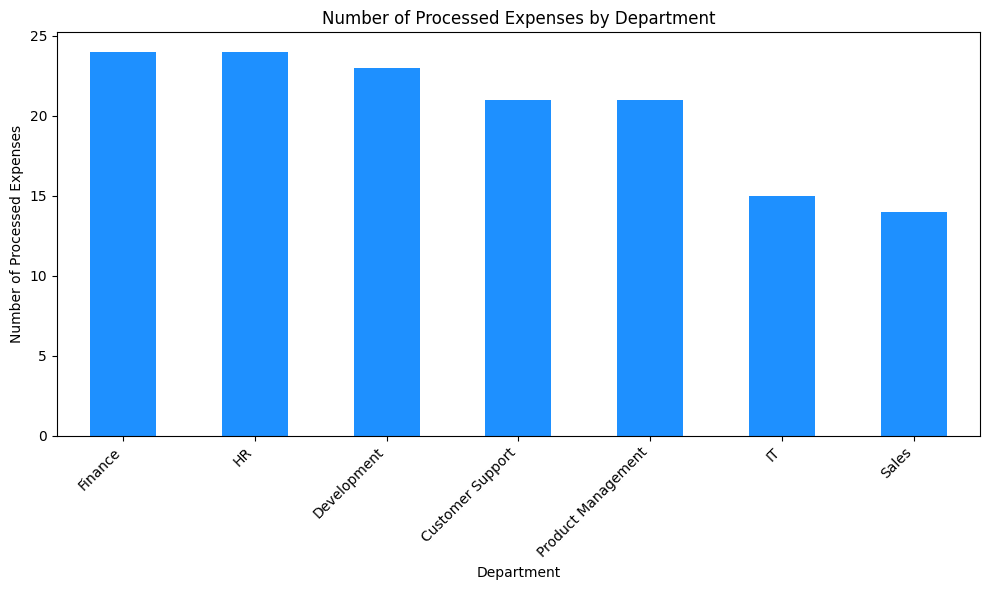

In [26]:
import matplotlib.pyplot as plt

# Filter for processed expenses and group by department
processed_expenses_by_department = df[df['state'] == 'Processed'].groupby('department').size().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
processed_expenses_by_department.plot(kind='bar', color='dodgerblue')
plt.title('Number of Processed Expenses by Department')
plt.xlabel('Department')
plt.ylabel('Number of Processed Expenses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [27]:
{
    "data_type": "descriptive",
    "insight": "Finance and HR departments have processed the highest number of expenses.",
    "insight_value": {
        "description": "Both the Finance and HR departments have processed 24 expenses each, indicating a high level of activity in these departments."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Processed Expenses by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Finance", "HR", "Development", "Customer Support", "Product Management", "IT", "Sales"],
            "description": "This axis categorizes departments to show the number of processed expenses."
        },
        "y_axis": {
            "name": "Number of Processed Expenses",
            "value": {
                "Finance": 24,
                "HR": 24,
                "Development": 23,
                "Customer Support": 21,
                "Product Management": 21,
                "IT": 15,
                "Sales": 14
            },
            "description": "This axis displays the number of processed expenses for each department."
        },
        "description": "The bar chart illustrates the number of processed expenses by department, highlighting that Finance and HR have the highest number of processed expenses."
    },
    "question": "How many expenses have been processed by each department?",
    "actionable_insight": {
        "description": "Departments with a high number of processed expenses should ensure that their processing workflows are efficient to handle the volume. Departments with fewer processed expenses might need to review their processes to identify any potential delays or inefficiencies."
    }
}

{'data_type': 'descriptive',
 'insight': 'Finance and HR departments have processed the highest number of expenses.',
 'insight_value': {'description': 'Both the Finance and HR departments have processed 24 expenses each, indicating a high level of activity in these departments.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Processed Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['Finance',
    'HR',
    'Development',
    'Customer Support',
    'Product Management',
    'IT',
    'Sales'],
   'description': 'This axis categorizes departments to show the number of processed expenses.'},
  'y_axis': {'name': 'Number of Processed Expenses',
   'value': {'Finance': 24,
    'HR': 24,
    'Development': 23,
    'Customer Support': 21,
    'Product Management': 21,
    'IT': 15,
    'Sales': 14},
   'description': 'This axis displays the number of processed expenses for each department.'},
  'description': 'The bar chart illustrates the number of processed

### **Question 5:  What is the average processing time by department?**


This analysis will provide insights into how quickly each department processes expenses, which can highlight potential bottlenecks or efficiency issues.

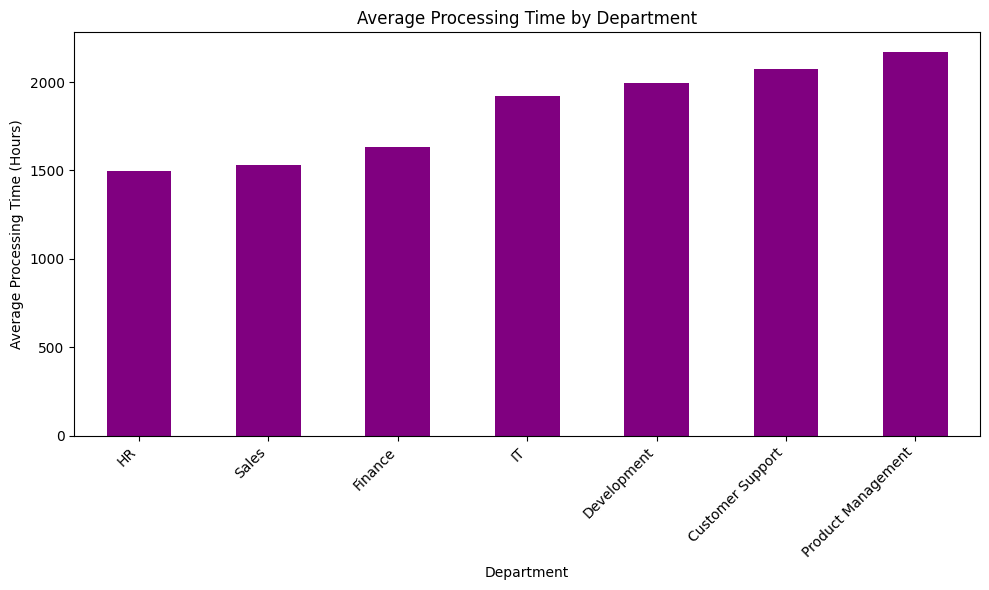

In [28]:
import matplotlib.pyplot as plt

# Group by department and calculate the average processing time for processed expenses
average_processing_time_by_department = df[df['state'] == 'Processed'].groupby('department')['processing_time_hours'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
average_processing_time_by_department.plot(kind='bar', color='purple')
plt.title('Average Processing Time by Department')
plt.xlabel('Department')
plt.ylabel('Average Processing Time (Hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [29]:
{
    "data_type": "descriptive",
    "insight": "HR has the quickest average processing time for expenses.",
    "insight_value": {
        "description": "The HR department processes expenses in an average of 1495.49 hours, which is the fastest among all departments."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Time by Department",
        "x_axis": {
            "name": "Department",
            "value": ["HR", "Sales", "Finance", "IT", "Development", "Customer Support", "Product Management"],
            "description": "This axis categorizes departments to show the average processing time of expense claims."
        },
        "y_axis": {
            "name": "Average Processing Time (Hours)",
            "value": {
                "HR": 1495.49,
                "Sales": 1531.35,
                "Finance": 1631.90,
                "IT": 1922.30,
                "Development": 1994.39,
                "Customer Support": 2076.27,
                "Product Management": 2172.44
            },
            "description": "This axis displays the average processing time in hours for each department."
        },
        "description": "The bar chart illustrates the average processing time for expense claims in different departments, with HR having the shortest processing time."
    },
    "question": "What is the average processing time by department?",
    "actionable_insight": {
        "description": "Departments with longer processing times should review their workflows to identify and address potential bottlenecks. Improving efficiency in expense processing can lead to faster financial operations and better resource management."
    }
}

{'data_type': 'descriptive',
 'insight': 'HR has the quickest average processing time for expenses.',
 'insight_value': {'description': 'The HR department processes expenses in an average of 1495.49 hours, which is the fastest among all departments.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by Department',
  'x_axis': {'name': 'Department',
   'value': ['HR',
    'Sales',
    'Finance',
    'IT',
    'Development',
    'Customer Support',
    'Product Management'],
   'description': 'This axis categorizes departments to show the average processing time of expense claims.'},
  'y_axis': {'name': 'Average Processing Time (Hours)',
   'value': {'HR': 1495.49,
    'Sales': 1531.35,
    'Finance': 1631.9,
    'IT': 1922.3,
    'Development': 1994.39,
    'Customer Support': 2076.27,
    'Product Management': 2172.44},
   'description': 'This axis displays the average processing time in hours for each department.'},
  'description': 'The bar chart illustrates the a

### Summary of Findings (Flag 43):

1. **Total Expenses by Department:** The Product Management department has the highest total expenses, amounting to $7,764,542. This indicates that Product Management is a major area of spending within the organization, which may reflect higher operational demands or resource needs compared to other departments.

2. **Average Expense per User by Department:** Customer Support has the highest average expense per user at approximately $76,380.74, significantly more than other departments. This suggests that expenses in Customer Support are higher, possibly due to the nature of its operations or spending practices that may require further review.

3. **Total Expenses by Category:** The 'Services' category dominates in terms of spending, with total expenses reaching $11,400,891. This reflects substantial investments in service-related expenses, indicating a focus on services within the organization.